## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.541910 -0.065229  1.339383 -1.138003 -0.765063  0.494506
1 -0.088768  0.092892 -0.919091  1.110952  0.635892  1.185502
2 -0.214317  0.277371 -1.132342  1.673190  1.407628  1.984642
3  1.022149  1.023937 -0.487850 -0.184630 -1.502709  0.073312
4  0.826371  0.936793  0.439629  1.206423  0.741014  1.970642


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9985612	total: 67.6ms	remaining: 1m 7s
1:	learn: 0.9887937	total: 68.3ms	remaining: 34.1s
2:	learn: 0.9798015	total: 69ms	remaining: 22.9s
3:	learn: 0.9715654	total: 69.6ms	remaining: 17.3s
4:	learn: 0.9628654	total: 70.2ms	remaining: 14s
5:	learn: 0.9546084	total: 70.8ms	remaining: 11.7s
6:	learn: 0.9460626	total: 71.4ms	remaining: 10.1s
7:	learn: 0.9361387	total: 72ms	remaining: 8.92s
8:	learn: 0.9277396	total: 72.5ms	remaining: 7.99s
9:	learn: 0.9198537	total: 73.1ms	remaining: 7.24s
10:	learn: 0.9120591	total: 73.7ms	remaining: 6.62s
11:	learn: 0.9034396	total: 74.2ms	remaining: 6.11s
12:	learn: 0.8945124	total: 74.7ms	remaining: 5.67s
13:	learn: 0.8870761	total: 75.3ms	remaining: 5.3s
14:	learn: 0.8813250	total: 75.8ms	remaining: 4.98s
15:	learn: 0.8744639	total: 76.3ms	remaining: 4.69s
16:	learn: 0.8681684	total: 76.7ms	remaining: 4.43s
17:	learn: 0.8599244	total: 77.2ms	remaining: 4.21s
18:	learn: 0.8529712	total: 77.7ms	remaining: 4.01s

85:	learn: 0.5077503	total: 109ms	remaining: 1.16s
86:	learn: 0.5040869	total: 109ms	remaining: 1.15s
87:	learn: 0.5002478	total: 110ms	remaining: 1.14s
88:	learn: 0.4963408	total: 110ms	remaining: 1.13s
89:	learn: 0.4927656	total: 111ms	remaining: 1.12s
90:	learn: 0.4888648	total: 111ms	remaining: 1.11s
91:	learn: 0.4849639	total: 112ms	remaining: 1.1s
92:	learn: 0.4816043	total: 112ms	remaining: 1.09s
93:	learn: 0.4781230	total: 113ms	remaining: 1.09s
94:	learn: 0.4747209	total: 113ms	remaining: 1.08s
95:	learn: 0.4707345	total: 114ms	remaining: 1.07s
96:	learn: 0.4674509	total: 114ms	remaining: 1.06s
97:	learn: 0.4635018	total: 115ms	remaining: 1.06s
98:	learn: 0.4596376	total: 115ms	remaining: 1.05s
99:	learn: 0.4571432	total: 116ms	remaining: 1.04s
100:	learn: 0.4538067	total: 116ms	remaining: 1.03s
101:	learn: 0.4504318	total: 117ms	remaining: 1.03s
102:	learn: 0.4473104	total: 117ms	remaining: 1.02s
103:	learn: 0.4441941	total: 118ms	remaining: 1.01s
104:	learn: 0.4405837	total:

247:	learn: 0.1833268	total: 188ms	remaining: 569ms
248:	learn: 0.1822455	total: 188ms	remaining: 567ms
249:	learn: 0.1810777	total: 188ms	remaining: 565ms
250:	learn: 0.1798334	total: 189ms	remaining: 564ms
251:	learn: 0.1788887	total: 190ms	remaining: 563ms
252:	learn: 0.1779172	total: 190ms	remaining: 561ms
253:	learn: 0.1769396	total: 190ms	remaining: 559ms
254:	learn: 0.1761709	total: 191ms	remaining: 558ms
255:	learn: 0.1750649	total: 191ms	remaining: 556ms
256:	learn: 0.1736807	total: 192ms	remaining: 554ms
257:	learn: 0.1727107	total: 192ms	remaining: 553ms
258:	learn: 0.1718503	total: 193ms	remaining: 551ms
259:	learn: 0.1709625	total: 193ms	remaining: 549ms
260:	learn: 0.1696819	total: 194ms	remaining: 548ms
261:	learn: 0.1684014	total: 194ms	remaining: 547ms
262:	learn: 0.1673570	total: 194ms	remaining: 545ms
263:	learn: 0.1660113	total: 195ms	remaining: 543ms
264:	learn: 0.1650926	total: 195ms	remaining: 542ms
265:	learn: 0.1641997	total: 196ms	remaining: 540ms
266:	learn: 

466:	learn: 0.0513097	total: 293ms	remaining: 334ms
467:	learn: 0.0510315	total: 293ms	remaining: 334ms
468:	learn: 0.0508593	total: 294ms	remaining: 333ms
469:	learn: 0.0505624	total: 294ms	remaining: 332ms
470:	learn: 0.0503248	total: 295ms	remaining: 331ms
471:	learn: 0.0500091	total: 295ms	remaining: 330ms
472:	learn: 0.0495864	total: 296ms	remaining: 329ms
473:	learn: 0.0494341	total: 296ms	remaining: 329ms
474:	learn: 0.0491688	total: 297ms	remaining: 328ms
475:	learn: 0.0489063	total: 297ms	remaining: 327ms
476:	learn: 0.0487491	total: 298ms	remaining: 326ms
477:	learn: 0.0483426	total: 298ms	remaining: 326ms
478:	learn: 0.0481984	total: 299ms	remaining: 325ms
479:	learn: 0.0479194	total: 299ms	remaining: 324ms
480:	learn: 0.0476873	total: 300ms	remaining: 323ms
481:	learn: 0.0474148	total: 300ms	remaining: 322ms
482:	learn: 0.0472505	total: 300ms	remaining: 321ms
483:	learn: 0.0470246	total: 301ms	remaining: 321ms
484:	learn: 0.0468195	total: 301ms	remaining: 320ms
485:	learn: 

596:	learn: 0.0299036	total: 353ms	remaining: 238ms
597:	learn: 0.0298758	total: 354ms	remaining: 238ms
598:	learn: 0.0297571	total: 354ms	remaining: 237ms
599:	learn: 0.0297296	total: 355ms	remaining: 236ms
600:	learn: 0.0297103	total: 355ms	remaining: 236ms
601:	learn: 0.0296265	total: 355ms	remaining: 235ms
602:	learn: 0.0294735	total: 356ms	remaining: 234ms
603:	learn: 0.0293027	total: 356ms	remaining: 234ms
604:	learn: 0.0292064	total: 357ms	remaining: 233ms
605:	learn: 0.0291801	total: 357ms	remaining: 232ms
606:	learn: 0.0291543	total: 358ms	remaining: 232ms
607:	learn: 0.0290582	total: 358ms	remaining: 231ms
608:	learn: 0.0289637	total: 359ms	remaining: 230ms
609:	learn: 0.0287940	total: 359ms	remaining: 230ms
610:	learn: 0.0287771	total: 360ms	remaining: 229ms
611:	learn: 0.0286171	total: 360ms	remaining: 228ms
612:	learn: 0.0284608	total: 361ms	remaining: 228ms
613:	learn: 0.0283323	total: 361ms	remaining: 227ms
614:	learn: 0.0282410	total: 362ms	remaining: 226ms
615:	learn: 

819:	learn: 0.0147811	total: 458ms	remaining: 101ms
820:	learn: 0.0147377	total: 459ms	remaining: 100ms
821:	learn: 0.0146674	total: 459ms	remaining: 99.4ms
822:	learn: 0.0146250	total: 459ms	remaining: 98.8ms
823:	learn: 0.0145869	total: 460ms	remaining: 98.3ms
824:	learn: 0.0145238	total: 461ms	remaining: 97.7ms
825:	learn: 0.0144828	total: 461ms	remaining: 97.1ms
826:	learn: 0.0144237	total: 462ms	remaining: 96.5ms
827:	learn: 0.0143834	total: 462ms	remaining: 96ms
828:	learn: 0.0143256	total: 463ms	remaining: 95.4ms
829:	learn: 0.0142692	total: 463ms	remaining: 94.8ms
830:	learn: 0.0142057	total: 464ms	remaining: 94.3ms
831:	learn: 0.0141834	total: 464ms	remaining: 93.7ms
832:	learn: 0.0141615	total: 464ms	remaining: 93.1ms
833:	learn: 0.0141220	total: 465ms	remaining: 92.6ms
834:	learn: 0.0140769	total: 465ms	remaining: 92ms
835:	learn: 0.0140414	total: 466ms	remaining: 91.4ms
836:	learn: 0.0140201	total: 467ms	remaining: 90.8ms
837:	learn: 0.0139820	total: 467ms	remaining: 90.3ms

981:	learn: 0.0090619	total: 536ms	remaining: 9.82ms
982:	learn: 0.0090372	total: 537ms	remaining: 9.28ms
983:	learn: 0.0090104	total: 537ms	remaining: 8.73ms
984:	learn: 0.0089776	total: 538ms	remaining: 8.19ms
985:	learn: 0.0089619	total: 538ms	remaining: 7.64ms
986:	learn: 0.0089379	total: 538ms	remaining: 7.09ms
987:	learn: 0.0089144	total: 539ms	remaining: 6.54ms
988:	learn: 0.0088904	total: 539ms	remaining: 6ms
989:	learn: 0.0088669	total: 540ms	remaining: 5.45ms
990:	learn: 0.0088161	total: 540ms	remaining: 4.9ms
991:	learn: 0.0087901	total: 540ms	remaining: 4.36ms
992:	learn: 0.0087744	total: 541ms	remaining: 3.81ms
993:	learn: 0.0087512	total: 541ms	remaining: 3.27ms
994:	learn: 0.0087021	total: 542ms	remaining: 2.72ms
995:	learn: 0.0086769	total: 542ms	remaining: 2.18ms
996:	learn: 0.0086542	total: 542ms	remaining: 1.63ms
997:	learn: 0.0086314	total: 543ms	remaining: 1.09ms
998:	learn: 0.0086087	total: 543ms	remaining: 543us
999:	learn: 0.0085940	total: 544ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

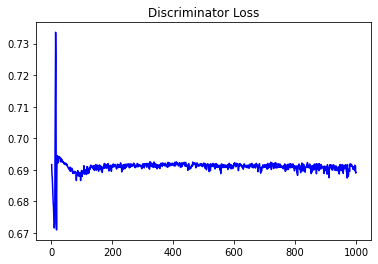

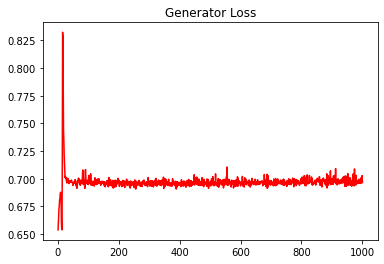

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06909475267707951


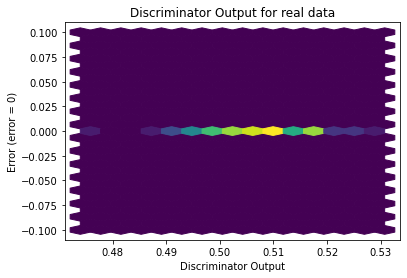

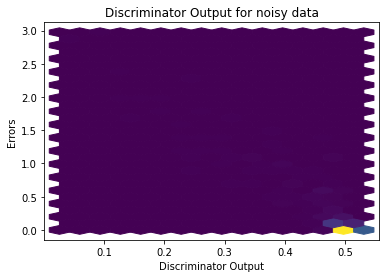

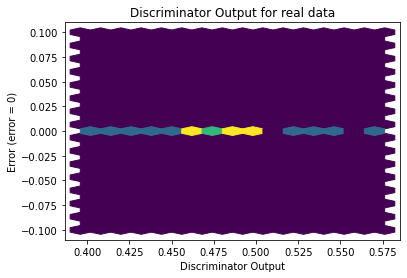

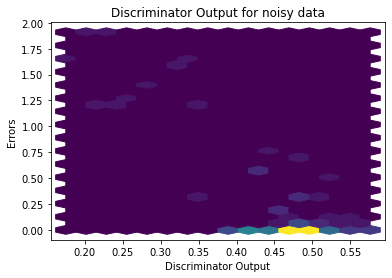

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


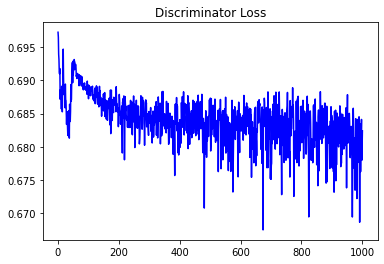

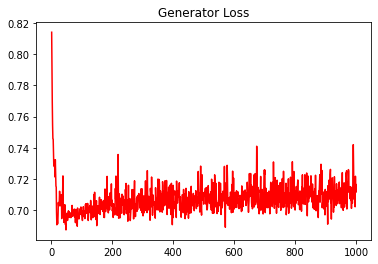

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03333013379648119


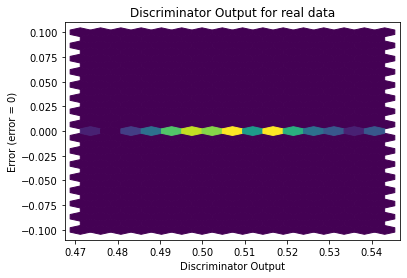

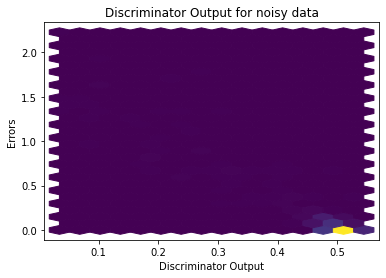

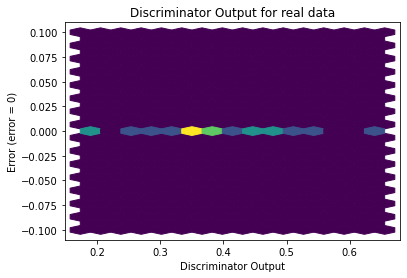

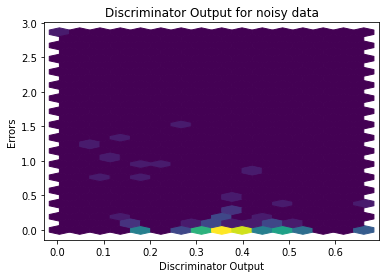

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2023]], requires_grad=True)
